# Generate Example Visuals
See Software Documentation (https://anl-ceeesa.github.io/RELOG/0.5/usage/) for Additional Examples

Python Dependencies: Pandas, Seaborn

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
sns.set_style("white")

In [6]:
simulation = "20230222_CASE0_v1"

### Plant Costs

#### Total Costs

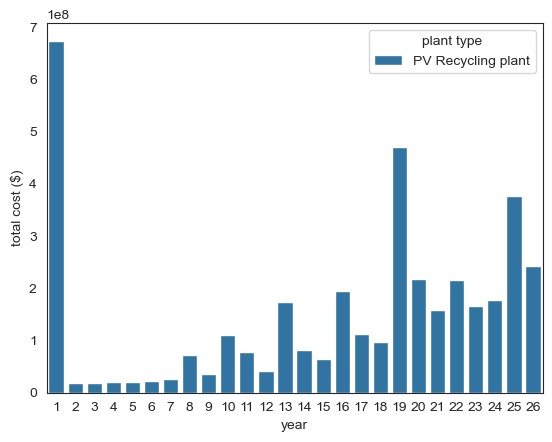

In [7]:
data = pd.read_csv(f"output/{simulation}/plants.csv")
sns.barplot(
    x="year",
    y="total cost ($)",
    hue="plant type",
    data=data.groupby(["plant type", "year"]).sum().reset_index(),
)
plt.savefig(f"figures/{simulation}/plant_costs.pdf", dpi=300);

In [8]:
data.columns

Index(['plant type', 'location name', 'year', 'latitude (deg)',
       'longitude (deg)', 'capacity (tonne)', 'amount processed (tonne)',
       'amount received (tonne)', 'amount in storage (tonne)',
       'utilization factor (%)', 'energy (GJ)', 'opening cost ($)',
       'expansion cost ($)', 'fixed operating cost ($)',
       'variable operating cost ($)', 'storage cost ($)', 'total cost ($)'],
      dtype='object')

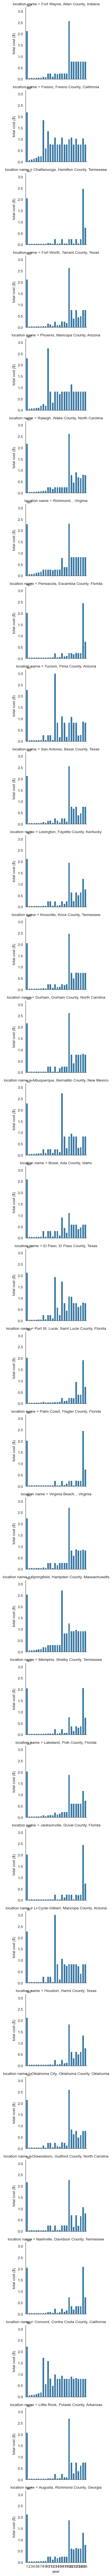

In [9]:
locations = sns.FacetGrid(data, row="location name")
locations.map(sns.barplot, "year", "total cost ($)", errorbar = None, order = None)

In [5]:
data

,plant type,location name,year,latitude (deg),longitude (deg),capacity (tonne),amount processed (tonne),amount received (tonne),amount in storage (tonne),utilization factor (%),energy (GJ),opening cost ($),expansion cost ($),fixed operating cost ($),variable operating cost ($),storage cost ($),total cost ($)
0,PV Recycling plant,"Bexar, Texas",1,29.5913,-98.5985,7200.0,0.00,0.00,0.0,0.00,0.00,15390000.0,0.0,386584.54,0.00,0.0,15776584.54
1,PV Recycling plant,"Bexar, Texas",2,29.5913,-98.5985,7200.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,386584.54,0.00,0.0,386584.54
2,PV Recycling plant,"Bexar, Texas",3,29.5913,-98.5985,7200.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,386584.54,0.00,0.0,386584.54
3,PV Recycling plant,"Bexar, Texas",4,29.5913,-98.5985,7200.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,386584.54,0.00,0.0,386584.54
4,PV Recycling plant,"Bexar, Texas",5,29.5913,-98.5985,7200.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,386584.54,0.00,0.0,386584.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,PV Recycling plant,"Caddo, Louisiana",24,32.4807,-93.7800,21600.0,21600.00,21600.00,0.0,100.00,18920.95,0.0,0.0,1146943.63,18235303.20,0.0,19382246.83
808,PV Recycling plant,"Caddo, Louisiana",25,32.4807,-93.7800,21600.0,713.79,713.79,0.0,3.30,625.26,0.0,0.0,1146943.63,602598.14,0.0,1749541.77
809,PV Recycling plant,"Caddo, Louisiana",26,32.4807,-93.7800,21600.0,838.84,838.84,0.0,3.88,734.79,0.0,0.0,1146943.63,708167.73,0.0,1855111.36
810,PV Recycling plant,"Caddo, Louisiana",27,32.4807,-93.7800,21600.0,1135.12,1135.12,0.0,5.26,994.33,0.0,0.0,1146943.63,958298.61,0.0,2105242.24


In [10]:
columns = [
    "opening cost ($)",
    "expansion cost ($)",
    "fixed operating cost ($)",
    "variable operating cost ($)",
    "storage cost ($)",
]

In [11]:
data.columns

Index(['plant type', 'location name', 'year', 'latitude (deg)',
       'longitude (deg)', 'capacity (tonne)', 'amount processed (tonne)',
       'amount received (tonne)', 'amount in storage (tonne)',
       'utilization factor (%)', 'energy (GJ)', 'opening cost ($)',
       'expansion cost ($)', 'fixed operating cost ($)',
       'variable operating cost ($)', 'storage cost ($)', 'total cost ($)'],
      dtype='object')

#### Cost Breakdown

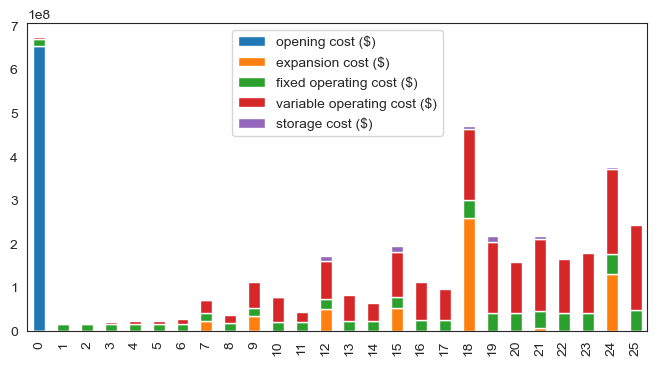

In [12]:
columns = [
    "opening cost ($)",
    "expansion cost ($)",
    "fixed operating cost ($)",
    "variable operating cost ($)",
    "storage cost ($)",
]
data = pd.read_csv(f"output/{simulation}/plants.csv")
df = data.groupby(["plant type", "year"]).sum().reset_index()
df[columns].plot(kind="bar", stacked=True, figsize=(8, 4))
plt.savefig(f"figures/{simulation}/plant_costs_breakdown.pdf", dpi=300);

### Transportation Data

**Troubleshoot if there is an error importing geopandas**

1) Install the following packages in your environment:
* ```conda install gdal```
* ```conda install fiona```
* ```conda install geopandas```

2) Import `fiona` *before* `geopandas`.
3) If you get a library not found, use [this workaround](https://stackoverflow.com/questions/71088072/installing-geopandas-on-apple-m1-chip) to solve it. In short, look for a library with similar same as the one that is not found, make a copy and name it as the one that it wants to find. In my case, it was looking for `libLerc.4.dylib` located in `/Users/mmendez/miniconda3/envs/RELOG/lib`. So I found the file `libLerc.dylib` and renamed it as `libLerc.4.dylib` and it worked! Wohoo!

*Note: This is most likely an error for M1 apple users.*

In [13]:
import fiona
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import collections
from shapely.geometry import LineString, Point

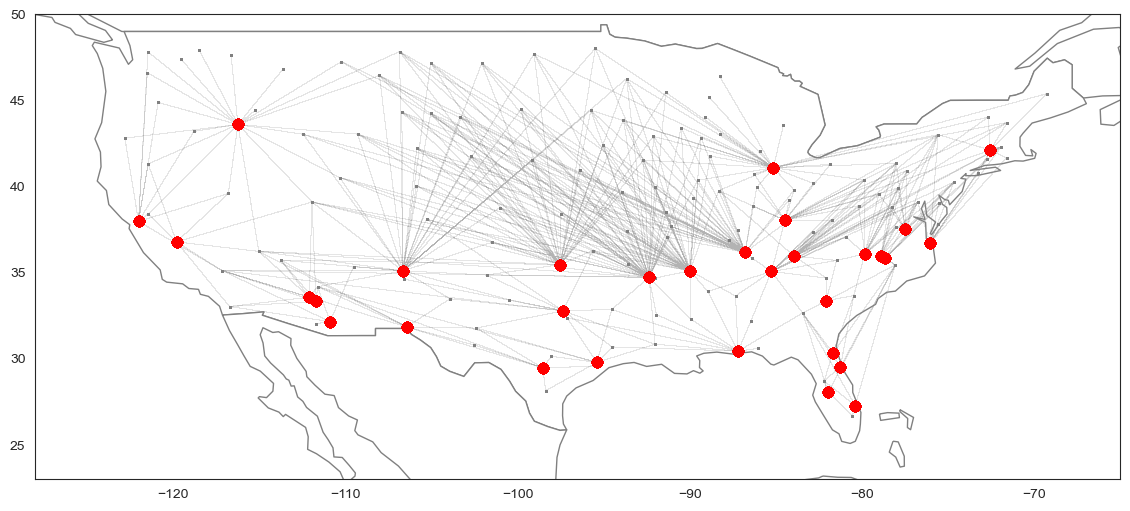

In [14]:
# Plot base map
world = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = world.plot(color="white", edgecolor="0.5", figsize=(14, 7))
ax.set_ylim([23, 50])
ax.set_xlim([-128, -65])

# Draw transportation lines
data = pd.read_csv(f"output/{simulation}/transportation.csv")
lines = [
    [
        (
            row["source longitude (deg)"],
            row["source latitude (deg)"],
        ),
        (
            row["destination longitude (deg)"],
            row["destination latitude (deg)"],
        ),
    ]
    for (index, row) in data.iterrows()
]
ax.add_collection(
    collections.LineCollection(
        lines,
        linewidths=0.01,
        zorder=1,
        alpha=0.5,
        color="0.7",
    )
)

# Draw source points
points = gp.points_from_xy(
    data["source longitude (deg)"],
    data["source latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="0.5", markersize=1)

# Draw destination points
points = gp.points_from_xy(
    data["destination longitude (deg)"],
    data["destination latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="red", markersize=50)
plt.savefig(f"figures/{simulation}/recycling_logistics.pdf", dpi=300);
plt.savefig(f"figures/{simulation}/recycling_logistics.png", dpi=300);

In [16]:
gp.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<AxesSubplot:>

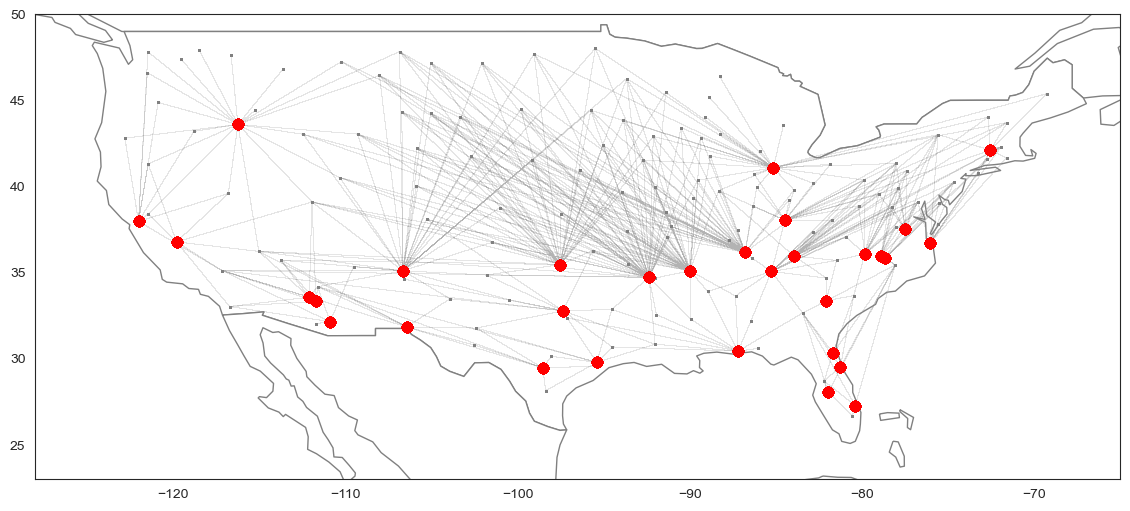

In [19]:
# Plot base map
world = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = world.plot(color="white", edgecolor="0.5", figsize=(14, 7))
ax.set_ylim([23, 50])
ax.set_xlim([-128, -65])

# Draw transportation lines
data = pd.read_csv(f"output/{simulation}/transportation.csv")
lines = [
    [
        (
            row["source longitude (deg)"],
            row["source latitude (deg)"],
        ),
        (
            row["destination longitude (deg)"],
            row["destination latitude (deg)"],
        ),
    ]
    for (index, row) in data.iterrows()
]
ax.add_collection(
    collections.LineCollection(
        lines,
        linewidths=0.01,
        zorder=1,
        alpha=0.5,
        color="0.7",
    )
)

# Draw source points
points = gp.points_from_xy(
    data["source longitude (deg)"],
    data["source latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="0.5", markersize=1)

# Draw destination points
points = gp.points_from_xy(
    data["destination longitude (deg)"],
    data["destination latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="red", markersize=50)
# plt.savefig(f"figures/{simulation}/recycling_logistics.pdf", dpi=300);
# plt.savefig(f"figures/{simulation}/recycling_logistics.png", dpi=300);